In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
from sklearn.preprocessing import MinMaxScaler

# Analysing and Exploring the Datas

In [42]:
# Loading the dataset
csv_metrics = pd.read_csv("http://vod.icomp.ufam.edu.br/video_dataset/csvs_metrics/video_quality.csv")
csv_metrics = csv_metrics.drop(['LPIPS','VMAF'], axis=1)
csv_metrics.head()

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM
0,34560000,153140.4,23,30,37.830948,0.841709
1,34560000,70482.2,29,30,34.691950,0.768763
2,34560000,48405.0,32,30,33.236920,0.723732
3,34560000,116526.4,26,30,36.754460,0.787863
4,34560000,72227.2,30,30,34.758755,0.737197


In [45]:
csv_metrics.describe()

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM
count,2.640000e+03,2.640000e+03,2640.000000,2640.000000,2640.000000,2640.000000
mean,1.269982e+08,1.321944e+06,30.744318,27.136364,34.964979,0.517834
std,9.675599e+07,4.188533e+06,4.492359,2.997467,3.940023,0.184661
min,2.764800e+07,2.230080e+04,14.000000,24.000000,20.241417,0.061618
25%,5.529600e+07,3.111084e+05,28.000000,24.000000,32.148144,0.400593
50%,9.417600e+07,6.543960e+05,31.000000,30.000000,34.807460,0.539559
75%,1.658880e+08,1.371574e+06,34.000000,30.000000,37.671411,0.656716
max,3.110400e+08,1.681524e+08,44.000000,30.000000,49.370070,0.930759


In [125]:
csv_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 6 columns):
RESOLUCAO    2640 non-null int64
BITRATE      2640 non-null float64
QP           2640 non-null int64
FPS          2640 non-null int64
PSNR         2640 non-null float64
SSIM         2640 non-null float64
dtypes: float64(3), int64(3)
memory usage: 123.8 KB


In [43]:
def bytesTobits(x):
    return x*8

In [44]:
#Multiply the bitrate for 8
csv_metrics['BITRATE'] = csv_metrics['BITRATE'].apply(lambda x: bytesTobits(x))
csv_metrics.head()

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM
0,34560000,1225123.2,23,30,37.830948,0.841709
1,34560000,563857.6,29,30,34.691950,0.768763
2,34560000,387240.0,32,30,33.236920,0.723732
3,34560000,932211.2,26,30,36.754460,0.787863
4,34560000,577817.6,30,30,34.758755,0.737197


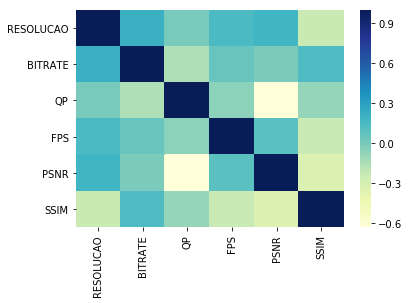

In [4]:
sns.heatmap(csv_metrics.corr(), cmap="YlGnBu")

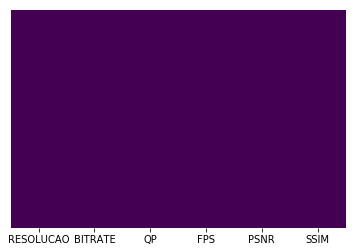

In [99]:
sns.heatmap(csv_metrics.isnull(),yticklabels=False,cbar=False,cmap='viridis')

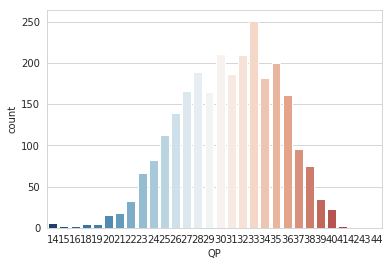

In [101]:
sns.set_style('whitegrid')

sns.countplot(x='QP',data=csv_metrics,palette='RdBu_r')

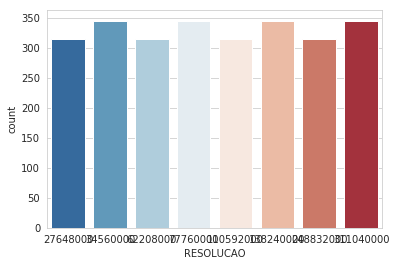

In [103]:
sns.countplot(x='RESOLUCAO',data=csv_metrics,palette='RdBu_r')

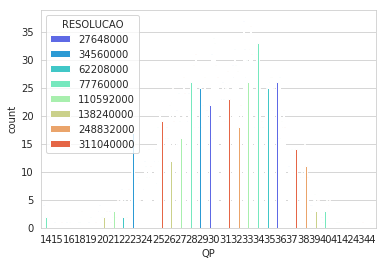

In [114]:
sns.countplot(x='QP',hue='RESOLUCAO',data=csv_metrics,palette='rainbow')

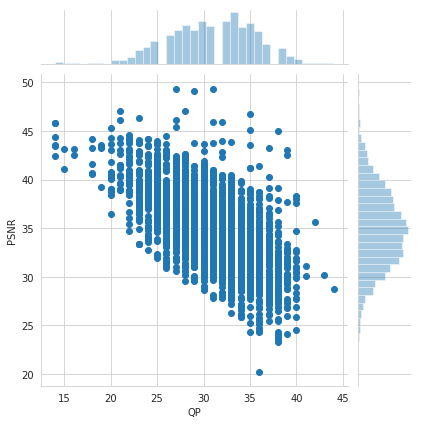

In [138]:

sns.jointplot(x='QP',y='PSNR',data=csv_metrics)

In [75]:

def createDataFrame(csv_metrics):
    list_dict = []
    
    for j in range(0, len(csv_metrics.index), 3):
        
        dict_metrics = {}
        
        dict_metrics["RESOLUCAO"] = csv_metrics["RESOLUCAO"][j]
        dict_metrics["FPS"] = csv_metrics["FPS"][j]
        
        dict_metrics["BITRATE1"] = csv_metrics["BITRATE"][j]
        dict_metrics["BITRATE2"] = csv_metrics["BITRATE"][j+1]
        dict_metrics["BITRATE3"] = csv_metrics["BITRATE"][j+2]
        
        dict_metrics["PSNR1"] = csv_metrics["PSNR"][j]
        dict_metrics["PSNR2"] = csv_metrics["PSNR"][j+1]
        dict_metrics["PSNR3"] = csv_metrics["PSNR"][j+2]
        
        dict_metrics["SSIM1"] = csv_metrics["SSIM"][j]
        dict_metrics["SSIM2"] = csv_metrics["SSIM"][j+1]
        dict_metrics["SSIM3"] = csv_metrics["SSIM"][j+2]
        
        dict_metrics["QP1"] = csv_metrics["QP"][j]
        dict_metrics["QP2"] = csv_metrics["QP"][j+1]
        dict_metrics["QP3"] = csv_metrics["QP"][j+2]
        
        list_dict.append(dict_metrics)
            
    return list_dict
    

In [92]:
df_csv = pd.DataFrame(createDataFrame(csv_metrics))
df_csv.head()

,BITRATE1,BITRATE2,BITRATE3,FPS,PSNR1,PSNR2,PSNR3,QP1,QP2,QP3,RESOLUCAO,SSIM1,SSIM2,SSIM3
0,1225123.2,563857.6,387240.0,30,37.830948,34.691950,33.236920,23,29,32,34560000,0.841709,0.768763,0.723732
1,932211.2,577817.6,405638.4,30,36.754460,34.758755,33.091034,26,30,33,34560000,0.787863,0.737197,0.689270
2,577515.2,330044.8,264721.6,30,35.854400,33.332720,32.209446,29,34,36,34560000,0.753501,0.685049,0.652938
3,435264.0,168742.4,111297.6,30,36.030660,32.363934,27.200453,25,31,34,34560000,0.803115,0.718049,0.603503
4,1425590.4,688408.0,442771.2,30,34.702904,32.138020,30.708460,26,31,34,34560000,0.654312,0.532417,0.455694


In [96]:
df_csv["QP1"].value_counts()

28    129
27    125
26    111
25     96
24     71
29     70
30     63
23     61
31     41
22     31
20     16
21     15
32     14
33     11
14      6
18      5
34      4
19      4
35      2
16      2
15      2
36      1
Name: QP1, dtype: int64

In [97]:
df_csv["QP2"].value_counts()

33    125
32    121
30    119
31    111
29     76
34     65
35     63
28     44
36     34
27     33
26     24
37     21
25     16
24     11
23      6
38      4
21      3
40      1
39      1
22      1
41      1
Name: QP2, dtype: int64

In [98]:
df_csv["QP3"].value_counts()

35    135
36    126
33    115
34    113
32     75
37     74
38     71
39     34
31     34
30     29
40     22
29     19
28     16
27      8
26      4
44      1
43      1
41      1
42      1
25      1
Name: QP3, dtype: int64

# Data Transformation

In [31]:
norm_data = MinMaxScaler()
X = norm_data.fit_transform(X)
y = y.reshape(-1,1)
y = norm_data.fit_transform(y)

# Training Division

In [121]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df_csv.drop(['QP1', 'QP2', 'QP3'], axis=1), 
                                                    df_csv['QP1'], test_size=0.30, 
                                                    random_state=101)